 # HW4 - EuroSAT Land Use and Land Cover Classification using Deep Learning


## Jenna Epstein

In this homework your task is to implement deep learning models to solve a typical problem in satellite imaging  using a benchmark dataset. The homework was designed to make you work on increasingly more complex models. We hope that the homework will be very helpful to improve your skills and knowledge in deep learning!

### S1:

- Visit the EuroSAT data description page and download the data: https://github.com/phelber/eurosat

- Split the data into training (50%) and testing sets (50%), stratified on class labels (equal percentage of each class type in train and test sets).

- Convert each RGB image to grayscale and flatten the images into a data matrix (n x p: n = #samples, p = #pixels in each image)


In [1]:
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
from PIL import Image, ImageOps
import seaborn as sns
import matplotlib.pyplot as plt
import skimage
from skimage import color, io


In [2]:
# RGB data
DATASET = "./EuroSAT/2750"
DATASET

'./EuroSAT/2750'

In [3]:
# Labels for the data
LABELS = os.listdir(DATASET)
print(LABELS)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


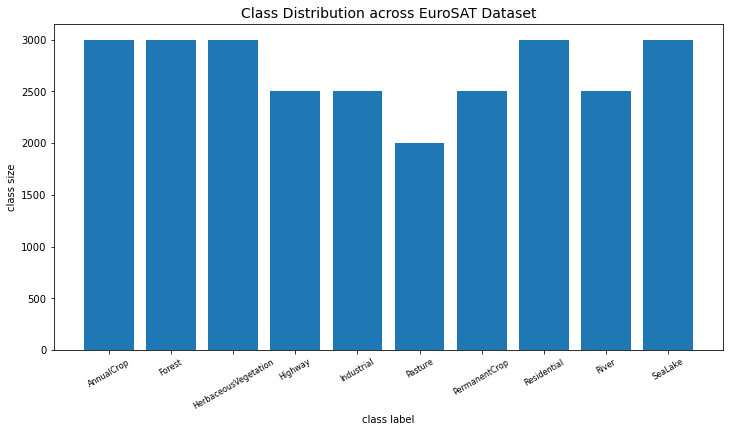

In [4]:
# Plot class distributions of whole dataset
counts = {}

for l in LABELS:
    counts[l] = len(os.listdir(os.path.join(DATASET, l)))

    
plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()))
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=8, rotation=30)
plt.xlabel('class label', fontsize=10)
plt.ylabel('class size', fontsize=10)
plt.title('Class Distribution across EuroSAT Dataset', fontsize=14);

In [5]:
# Class names
classNames = os.listdir(DATASET)
numClass = len(classNames)

In [6]:
lenClass = np.zeros(numClass)
for i in np.arange(0, numClass):
    lenClass[i] = len(os.listdir(DATASET + '/' + LABELS[i]))
# Returns the number of images in each class
lenClass 

array([3000., 3000., 3000., 2500., 2500., 2000., 2500., 3000., 2500.,
       3000.])

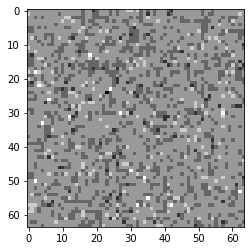

In [7]:
# View one grayscale image
imgSel = DATASET + '/' + classNames[i] + '/' + os.listdir(DATASET + '/' + classNames[i])[42]
img = PIL.Image.open(imgSel, 'r')
original_image = Image.open(imgSel)
img_gray = ImageOps.grayscale(original_image)
plt.imshow(img_gray, cmap='gray');

In [8]:
# Check shape
np.asarray(img_gray).shape

(64, 64)

In [9]:
# Number of pixels
numPixels = np.prod(np.asarray(img_gray).shape)
numPixels

4096

In [11]:
# Number of images
numImgs = int(lenClass.sum())
numImgs

27000

In [12]:
# Create X and y
X = np.zeros([numImgs, numPixels])
y = np.zeros(numImgs)

In [99]:
# Read in images as grayscale
imgInd=0
for i in np.arange(0, numClass):
  className = classNames[i]
  for imgName in os.listdir(DATASET + '/' + className):
    img = PIL.Image.open(DATASET + '/' + className + '/' + imgName, 'r')
    img = color.rgb2gray(io.imread('EuroSAT/2750/' + className + '/' + imgName))
    imgVec = np.asarray(img).flatten()
    X[imgInd,:] = imgVec
    y[imgInd] = i
    imgInd = imgInd + 1
    #print('Read img class ' + className + ' no ' + str(imgInd))


In [14]:
# Check X shape
X.shape

(27000, 4096)

In [15]:
# Check y shape
y.shape

(27000,)

In [16]:
from sklearn.model_selection import train_test_split

# Split data to train and test and stratify based on labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

### S2:

- Implement a first deep learning model (M.1) using a fully connected network with a single fully connected layer (i.e: input layer + fully connected layer as the output layer). 

Q2.1: Calculate classification accuracy on the test data.  

**Q2.1:** First deep learning model (**M1**) classification accuracy on test data: **0.2560** (25.6%)

In [17]:
from __future__ import print_function
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import plot_model

In [18]:
y_train.shape

(13500,)

In [18]:
# Set global stuff
batch_size = 64
num_classes = 10
epochs = 12

# Image dimensions
img_rows, img_cols = 64, 64

In [19]:
# Convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =keras.utils.np_utils.to_categorical(y_test, num_classes)

In [21]:
# Model 1 (M1)
M1 = Sequential()
M1.add(Dense(num_classes, activation='softmax', input_shape=(4096,)))

M1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40970     
Total params: 40,970
Trainable params: 40,970
Non-trainable params: 0
_________________________________________________________________


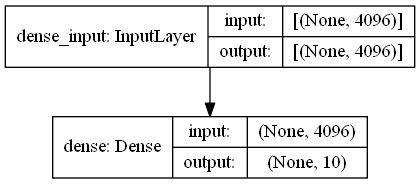

In [22]:
# Visualize M1
plot_model(M1, show_shapes=True, show_layer_names=True)

In [23]:
# Compile
M1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
# Fit
history = M1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 5s 22ms/step - loss: 2.3364 - accuracy: 0.1345 - val_loss: 2.2330 - val_accuracy: 0.1435
Epoch 2/12
211/211 [==============================] - 3s 15ms/step - loss: 2.2686 - accuracy: 0.1571 - val_loss: 2.2870 - val_accuracy: 0.1369
Epoch 3/12
211/211 [==============================] - 4s 20ms/step - loss: 2.2570 - accuracy: 0.1715 - val_loss: 2.2807 - val_accuracy: 0.1513
Epoch 4/12
211/211 [==============================] - 2s 11ms/step - loss: 2.2138 - accuracy: 0.1810 - val_loss: 2.2339 - val_accuracy: 0.1698
Epoch 5/12
211/211 [==============================] - 4s 20ms/step - loss: 2.1860 - accuracy: 0.2002 - val_loss: 2.1998 - val_accuracy: 0.2110
Epoch 6/12
211/211 [==============================] - 3s 14ms/step - loss: 2.1792 - accuracy: 0.2075 - val_loss: 2.2760 - val_accuracy: 0.1412
Epoch 7/12
211/211 [==============================] - 2s 9ms/step - loss: 2.1712 - accuracy: 0.2164 - val_loss: 2.2108 - val_accuracy: 0.2173


In [25]:
# Score
score = M1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.1780288219451904
Test accuracy: 0.25600001215934753


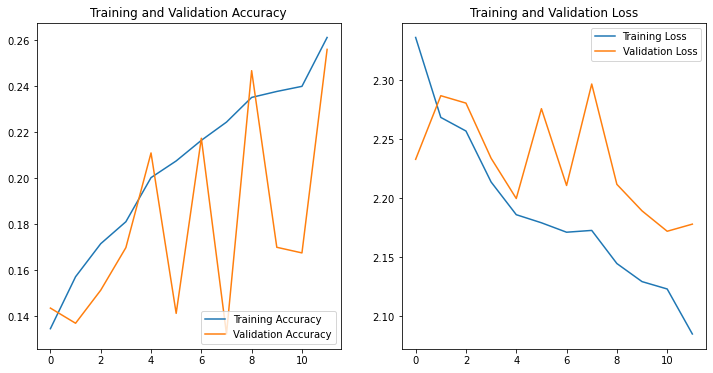

In [29]:
# Visualize metrics for M1

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### S3:

- Implement a second deep learning model (M.2) adding an additional fully connected hidden layer (with an arbitrary number of nodes) to the previous model. 

Q3.1: Calculate classification accuracy on the test data.  

**Q3.1:** Second deep learning model (**M2**) classification accuracy on test data: **0.3267** (32.7%)

In [30]:
# Model 2 (M2)
M2 = Sequential()
M2.add(Dense(1000, activation='relu', input_shape=(4096,)))
M2.add(Dense(num_classes, activation='softmax'))

M2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 4,107,010
Trainable params: 4,107,010
Non-trainable params: 0
_________________________________________________________________


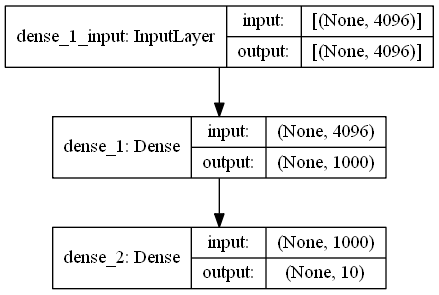

In [31]:
# Visualize
plot_model(M2, show_shapes=True, show_layer_names=True)

In [32]:
# Compile
M2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [34]:
# Fit
history = M2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 5s 22ms/step - loss: 1.8058 - accuracy: 0.3266 - val_loss: 1.8212 - val_accuracy: 0.3153
Epoch 2/12
211/211 [==============================] - 6s 26ms/step - loss: 1.7834 - accuracy: 0.3244 - val_loss: 1.8148 - val_accuracy: 0.3296
Epoch 3/12
211/211 [==============================] - 6s 26ms/step - loss: 1.7665 - accuracy: 0.3315 - val_loss: 1.7924 - val_accuracy: 0.3284
Epoch 4/12
211/211 [==============================] - 5s 26ms/step - loss: 1.7654 - accuracy: 0.3282 - val_loss: 1.8170 - val_accuracy: 0.3007
Epoch 5/12
211/211 [==============================] - 6s 26ms/step - loss: 1.7451 - accuracy: 0.3340 - val_loss: 1.7509 - val_accuracy: 0.3233
Epoch 6/12
211/211 [==============================] - 6s 30ms/step - loss: 1.7270 - accuracy: 0.3365 - val_loss: 1.8357 - val_accuracy: 0.3229
Epoch 7/12
211/211 [==============================] - 6s 27ms/step - loss: 1.7281 - accuracy: 0.3357 - val_loss: 1.7439 - val_accuracy: 0.3197

In [35]:
# Score
score = M2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7391600608825684
Test accuracy: 0.3266666531562805


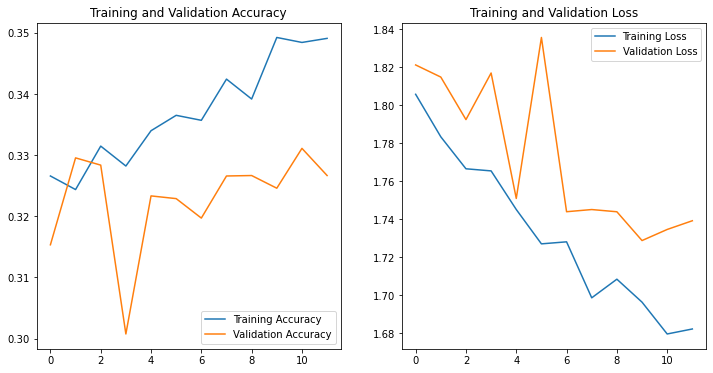

In [36]:
# Visualize metrics for M2

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### S4:

- Implement a third deep learning model (M.3) adding two additional fully connected hidden layers (with arbitrary number of nodes) for a total of four, as well as drop-out layers to the previous model. 

Q4.1: Calculate classification accuracy on the test data.

Q4.2: Compare against previous models. Which model was the "best"? Why?

**Q4.1:** Third deep learning model (M3) classification accuracy on test data: **0.1937** (19.4%)

**Q4.2:** Comparing **M3** against previous models (**M1** and **M2**), **M3** actually performs the worst. As shown in the metrics plots for **M3** below, while training accuracy increases to hover around 0.3 as it moves through the epocs, validation accuracy spikes up and down. Addiitnoally, the validation loss spikes and drops, but still creeping upward, while training loss is minimized. **M2** performs the best out of these three so far with a test accuracy of nearly 33%. Training and validation losses are lower as it is run over the epochs.

In [37]:
M3 = Sequential()
M3.add(Dense(1000, activation='relu', input_shape=(4096,)))
M3.add(Dropout(0.25))
M3.add(Dense(1100, activation='relu'))
M3.add(Dropout(0.25))
M3.add(Dense(1200, activation='relu'))
M3.add(Dropout(0.25))
M3.add(Dense(num_classes, activation='softmax'))

M3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1100)              1101100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1100)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1200)              1321200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

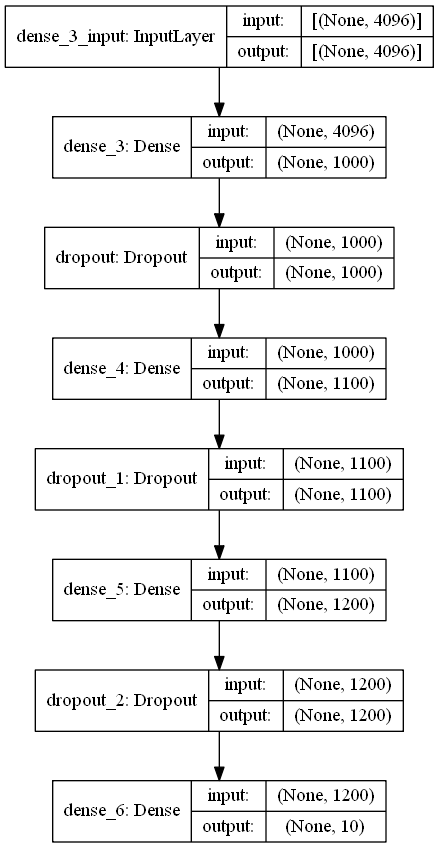

In [38]:
# Visualize
plot_model(M3, show_shapes=True, show_layer_names=True)

In [39]:
# Compile
M3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [40]:
# Fit
history = M3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 10s 44ms/step - loss: 2.3051 - accuracy: 0.1387 - val_loss: 2.1233 - val_accuracy: 0.1746
Epoch 2/12
211/211 [==============================] - 10s 49ms/step - loss: 2.0164 - accuracy: 0.2247 - val_loss: 2.2001 - val_accuracy: 0.1770
Epoch 3/12
211/211 [==============================] - 13s 64ms/step - loss: 1.9223 - accuracy: 0.2545 - val_loss: 2.3945 - val_accuracy: 0.1447
Epoch 4/12
211/211 [==============================] - 13s 63ms/step - loss: 1.8841 - accuracy: 0.2737 - val_loss: 2.1176 - val_accuracy: 0.1932
Epoch 5/12
211/211 [==============================] - 10s 49ms/step - loss: 1.8777 - accuracy: 0.2809 - val_loss: 2.0859 - val_accuracy: 0.2134
Epoch 6/12
211/211 [==============================] - 12s 59ms/step - loss: 1.8609 - accuracy: 0.2832 - val_loss: 2.5086 - val_accuracy: 0.1607
Epoch 7/12
211/211 [==============================] - 9s 43ms/step - loss: 1.8645 - accuracy: 0.2803 - val_loss: 2.6741 - val_accuracy: 

In [41]:
# Score
score = M3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.5821003913879395
Test accuracy: 0.19370371103286743


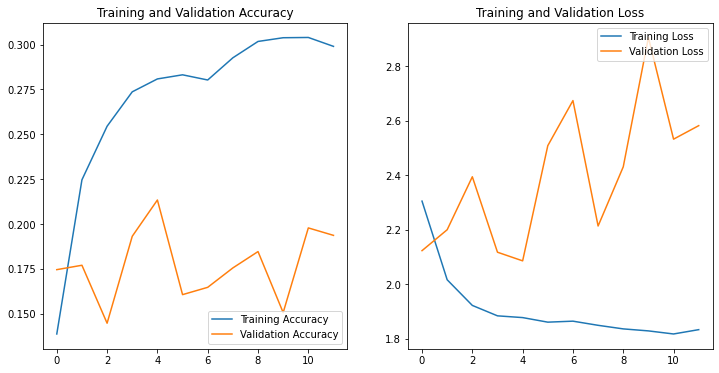

In [42]:
# Visualize metrics for M3

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### S5:

- Take the original RGB images and do not vectorize them. Use these images as the data input for the following models (M.4 and M.5).
- Implement a fourth CNN model (M.4) that includes the following layers: Conv2D, MaxPooling2D, Dropout, Flatten, Dense. 

Q5.1: Calculate classification accuracy on the test data.

Q5.2: Compare against previous models. Which model was the "best"? Why?

**Q5.1:** Fourth model (M4) classification accuracy on test data: **0.767** (70.7%)

**Q5.2:** Compared against previous models, **M4** performs much better, with a test data accuracy of nearly 71%. This is the first model run on the images as they are in RGB format (the first three models ran on grayscale images), so the incorporation of the three colors may have been a factor in bolstering the performance. With inclusion of Conv2D layers in this model, the CNN model becomes more efficient than the previous deep learning models, especially with accuracy, and can detect important spatial relational features. The layer for rescaling also helped in preprocessing to scale the data. Inclusion of MaxPooling also reduces the spatial dimensions ofthe output,, and can help with overfitting. We can see in the figure plots below in this section, as model runs through the 12 epochs, over time the network learns to minimize loss - especially with the training data. As loss decreases, the model's accuracy increases.

In [20]:
# Reading in the data in again, but this time so not to vectorize
import glob 
import os 

img_files = [] 
for file in glob.glob(DATASET + os.sep + "*" + os.sep + "*.jpg"):
  img_files.append(file)

# Load images as RGB
imgs_rgb = []
for imgName in img_files:
  temp = io.imread(imgName)
  imgs_rgb.append(temp)

In [21]:
# Check the shape to make sure
np.asarray(imgs_rgb).shape

(27000, 64, 64, 3)

In [22]:
# Stack
imgs_rgb_stack = np.stack(imgs_rgb)

In [23]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs_rgb_stack, y, test_size=0.5, random_state=42, stratify=y)

In [24]:
X_train.shape

(13500, 64, 64, 3)

In [25]:
# Set input shape
input_shape = (64, 64, 3)

In [26]:
from tensorflow.keras import layers

# Adding a rescaling layer to help with scaling the data. This is done in place of minmaxscalar to achieve similar effect.
rescaling_layer = layers.experimental.preprocessing.Rescaling(
    scale=1. / 255,
    input_shape=input_shape)

In [71]:
# Model 4 (M4)
M4 = Sequential()
M4.add(rescaling_layer)
M4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
M4.add(MaxPooling2D(pool_size=(2, 2)))
M4.add(Dropout(0.25))
M4.add(Flatten())
M4.add(Dense(num_classes, activation='softmax'))

M4.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                307530    
Total params: 308,426
Trainable params: 308,426
Non-trainable params: 0
________________________________________________

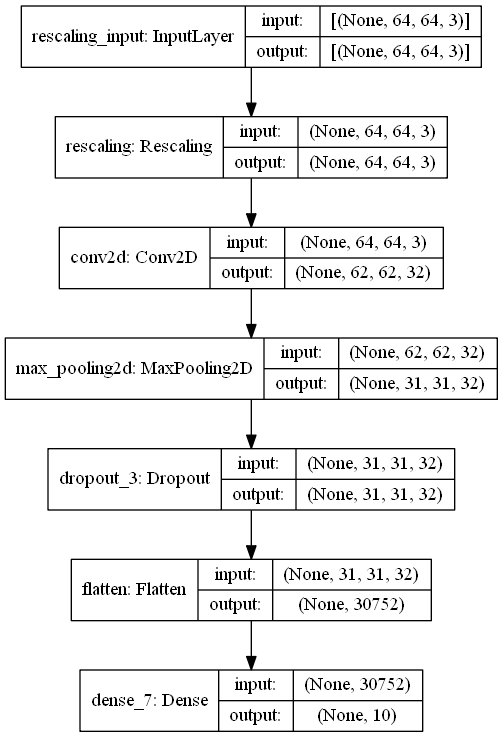

In [51]:
# Visualize
plot_model(M4, show_shapes=True, show_layer_names=True)

In [72]:
# Compile
# Using sparse categorical cross entropy here - uses less memory and less computationally intensive
# Sparse cat cross entropy uses a single integer for a class, rather than a whole vector
M4.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [73]:
# Fit
history = M4.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 16s 77ms/step - loss: 1.5750 - accuracy: 0.4243 - val_loss: 1.3155 - val_accuracy: 0.5087
Epoch 2/12
211/211 [==============================] - 17s 82ms/step - loss: 1.1788 - accuracy: 0.5821 - val_loss: 1.1640 - val_accuracy: 0.5876
Epoch 3/12
211/211 [==============================] - 18s 85ms/step - loss: 0.9930 - accuracy: 0.6568 - val_loss: 0.9739 - val_accuracy: 0.6517
Epoch 4/12
211/211 [==============================] - 15s 73ms/step - loss: 0.9024 - accuracy: 0.6853 - val_loss: 1.0651 - val_accuracy: 0.6151
Epoch 5/12
211/211 [==============================] - 18s 87ms/step - loss: 0.8352 - accuracy: 0.7106 - val_loss: 0.9016 - val_accuracy: 0.6930
Epoch 6/12
211/211 [==============================] - 15s 69ms/step - loss: 0.7837 - accuracy: 0.7309 - val_loss: 0.8668 - val_accuracy: 0.7008
Epoch 7/12
211/211 [==============================] - 21s 102ms/step - loss: 0.7163 - accuracy: 0.7556 - val_loss: 0.8798 - val_accuracy

In [74]:
# Score
score = M4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.879562258720398
Test accuracy: 0.7067407369613647


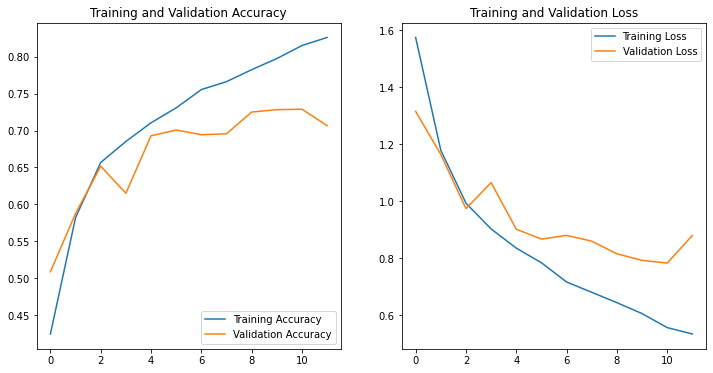

In [75]:
# Visualize metrics for M4

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### S6:

- Using RGB images from S5, implement a fifth deep learning model (M.5) targeting accuracy that will outperform all previous models. You are free to use any tools and techniques, as well as pre-trained models for transfer learning. 

Q6.1: Describe the model you built, and why you chose it.

Q6.2: Calculate classification accuracy on the test data.

Q6.3: Compare against previous models. Which model was the "best"? Why?

Q6.4: What are the two classes with the highest labeling error? Explain using data and showing mis-classified examples.

**Q6.1:** For this model, I chose to add several additional conv2d layers with different numbers of filters, additional maxpooling layers and additional dropouts. I ran two iterations of the model - **M5_1** and **M5_2** - with **M5_2** producing the best results. **M5_2** incorporates conv2d layers with filter sizes increasing (by doubling) each time, addition of padding = same, maxpooling layers after each conv2d, dropout rates smaller than in the previous model, and different number of nodes in a dense layer. I specifically wanted to add multiple conv2d layers with increasing number of filters due to the complex nature of the images in the dataset. The patterns get more complex as the model gets deeper, and the more combinations of patterns to detect means that increased number of filters can help to capture as many of those as possible.

**Q6.2:** **M5_2** classification accuracy on the test data: **0.8733** (87.3%) 
- For comparison, **M5_1** test accuracy was 0.7993 (79.9%)

**Q6.3:** **M5_2** is the best model by far. The accuracy on the test data is much better than all previous models, and as the model runs through the epochs, one can see that the accuracy is consistently at better points than all priro models. The inclusion fo the additional conv2d layers and overall greater depth of layers helps account for more complex patterns in the data.

_Q6.4 - Answered later in this section, above the example images_

In [27]:
# M5_1
M5_1 = Sequential()
M5_1.add(rescaling_layer)
M5_1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
M5_1.add(Conv2D(64, kernel_size=(3, 3), # add another conv2d layer
                 activation='relu'))
M5_1.add(MaxPooling2D(pool_size=(2, 2)))
M5_1.add(Dropout(0.25))
M5_1.add(Flatten())
M5_1.add(Dense(1000, activation='relu'))
M5_1.add(Dropout(0.25))
M5_1.add(Dense(num_classes, activation='softmax'))


M5_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              5

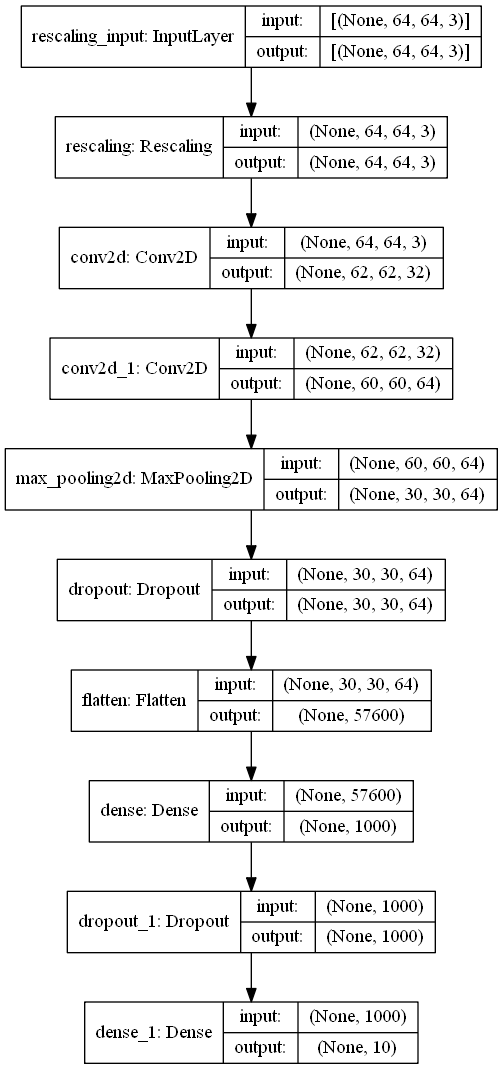

In [28]:
# Visualize
plot_model(M5_1, show_shapes=True, show_layer_names=True)

In [29]:
# Compile
M5_1.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
# Fit
history = M5_1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 117s 551ms/step - loss: 1.6832 - accuracy: 0.4021 - val_loss: 1.1209 - val_accuracy: 0.5962
Epoch 2/12
211/211 [==============================] - 120s 568ms/step - loss: 1.0527 - accuracy: 0.6173 - val_loss: 1.0225 - val_accuracy: 0.6329
Epoch 3/12
211/211 [==============================] - 104s 492ms/step - loss: 0.8799 - accuracy: 0.6806 - val_loss: 0.9049 - val_accuracy: 0.6759
Epoch 4/12
211/211 [==============================] - 120s 569ms/step - loss: 0.7435 - accuracy: 0.7349 - val_loss: 0.6913 - val_accuracy: 0.7621
Epoch 5/12
211/211 [==============================] - 95s 452ms/step - loss: 0.6039 - accuracy: 0.7857 - val_loss: 0.6830 - val_accuracy: 0.7633
Epoch 6/12
211/211 [==============================] - 118s 559ms/step - loss: 0.4969 - accuracy: 0.8236 - val_loss: 0.8409 - val_accuracy: 0.7040
Epoch 7/12
211/211 [==============================] - 126s 598ms/step - loss: 0.3970 - accuracy: 0.8633 - val_loss: 0.6855 - 

In [69]:
# Score
score = M5_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.934769868850708
Test accuracy: 0.7992592453956604


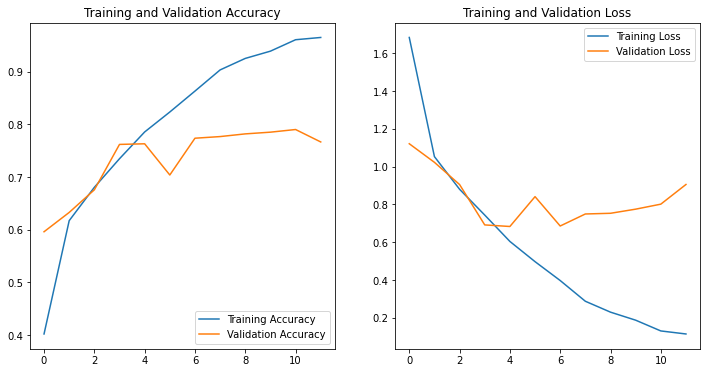

In [32]:
# Visualize metrics for M5_1

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### M5_2 (best model):


In [33]:
M5_2 = Sequential()
# Add rescaling layer
M5_2.add(rescaling_layer),
# Add first conv2d layer with max pooling
M5_2.add(Conv2D(16, kernel_size=(3, 3), padding='same',
                  activation='relu', input_shape=input_shape)),
M5_2.add(MaxPooling2D(pool_size=(2, 2), padding="valid")),
# Add convolutional layer and max pooling
M5_2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')),
M5_2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")),
# Add another convolutional layer and max pooling
M5_2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')),
M5_2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")),
# Add another convolutional layer and max pooling
M5_2.add(Conv2D(128, kernel_size=3, padding='same', activation='relu')),
M5_2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")),
M5_2.add(Dropout(rate=0.1)),
M5_2.add(Flatten()),
# Dense fully connected layer
M5_2.add(Dense(units=256, activation='relu')),
M5_2.add(Dropout(rate=0.1)),
# Output dense layer with num_classes
M5_2.add(Dense(num_classes, activation="softmax"))

# Summary
M5_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [34]:
# Compile
M5_2.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [37]:
# Fit
history = M5_2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 16s 76ms/step - loss: 0.3572 - accuracy: 0.8744 - val_loss: 0.4005 - val_accuracy: 0.8589
Epoch 2/12
211/211 [==============================] - 18s 86ms/step - loss: 0.3083 - accuracy: 0.8930 - val_loss: 0.4158 - val_accuracy: 0.8565
Epoch 3/12
211/211 [==============================] - 19s 91ms/step - loss: 0.3021 - accuracy: 0.8915 - val_loss: 0.4787 - val_accuracy: 0.8347
Epoch 4/12
211/211 [==============================] - 19s 91ms/step - loss: 0.2550 - accuracy: 0.9095 - val_loss: 0.3686 - val_accuracy: 0.8730
Epoch 5/12
211/211 [==============================] - 19s 90ms/step - loss: 0.2439 - accuracy: 0.9150 - val_loss: 0.3846 - val_accuracy: 0.8656
Epoch 6/12
211/211 [==============================] - 19s 89ms/step - loss: 0.2170 - accuracy: 0.9214 - val_loss: 0.3725 - val_accuracy: 0.8767
Epoch 7/12
211/211 [==============================] - 19s 92ms/step - loss: 0.1904 - accuracy: 0.9327 - val_loss: 0.4640 - val_accuracy:

In [38]:
# Score
score = M5_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4263646900653839
Test accuracy: 0.8733333349227905


In [39]:
# Get the results with label error for each class
M5_2_results = M5_2.predict(X_test)

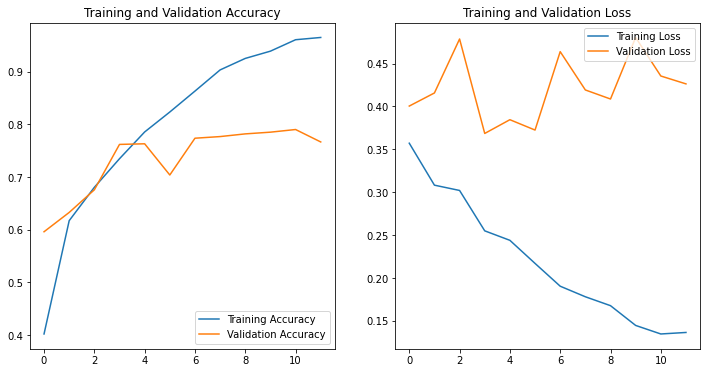

In [40]:
# Visualize metrics for M5_2
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
# y_preds using argmax (index of highest probability indicates predicted class)
y_preds = np.argmax(M5_2_results, axis=1)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

In [ ]:
# Confusion matrix to show comparision between what the class is based on the test data, and what the model predicted the class to be
# Low numbers are good. 
# Diagonal from top left to bottom right is a class compared to itself - values should be high.
# In this normalized conf matrix, values are 0-1.

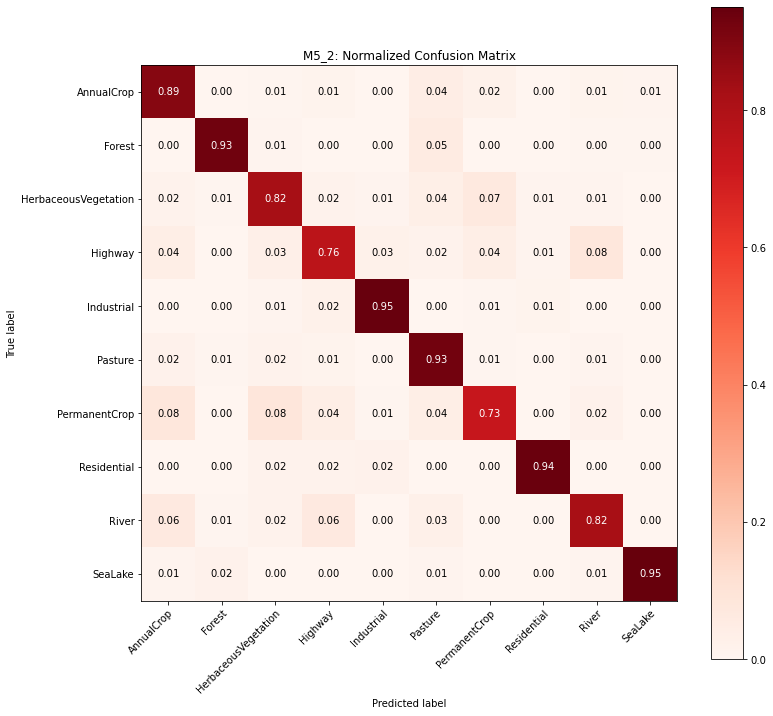

In [43]:
# Plot the confusion matrix
%matplotlib inline
plt.rcParams['axes.grid'] = False 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
ax.figure.colorbar(im, ax=ax)

# Show all ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # and label them with the respective list entries
       xticklabels=LABELS, yticklabels=LABELS,
       title='M5_2: Normalized Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black");

**Q6.4: What are the two classes with the highest labeling error? Explain using data and showing mis-classified examples.**
- After using np.argmax() on the model results (predictions) and displaying visually in this normalized confusion matrix, we can see the results of the classifications.
- For the highest labeling error, there were a few matches at 0.08. I will show examples two cases: 
1. Class 6 "PermanentCrop" is misclassified as class 2 "HerbaceousVegetation" (2). Example images showing successful and unsuccessful classification are below.
2. Class 8 "River" is misclassified as class 3 "Highway" (2). Example images showing successful and unsuccessful classification are below.

Note that the other misclassification relates to Class 6 as well, where 'PermanentCrop' is misclassified as 'AnnualCrop'

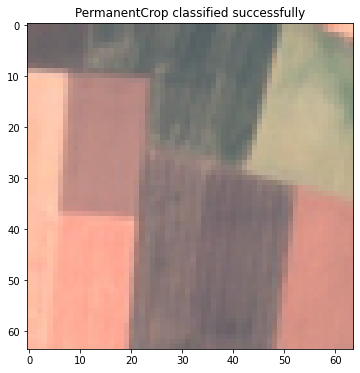

In [44]:
# Example of a "PermanentCrop" image classified successfully
plt.figure(figsize=(6, 6))
success_1 = np.where((y_test == 6) & (y_preds == 6))[0][0]
success_1_img = io.imread(img_files[success_1])
plt.imshow(success_1_img)
plt.title('PermanentCrop classified successfully');


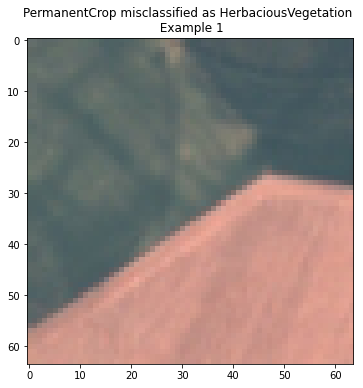

In [46]:
# Example of a "PermanentCrop" image classified unsuccessfully (misclassified as "HerbaciousVegetation")
plt.figure(figsize=(6, 6))
fail_1 = np.where((y_test == 6) & (y_preds == 2))[0][12]
fail_1_img = io.imread(img_files[fail_1])
plt.imshow(fail_1_img)
plt.title('PermanentCrop misclassified as HerbaciousVegetation \n Example 1');


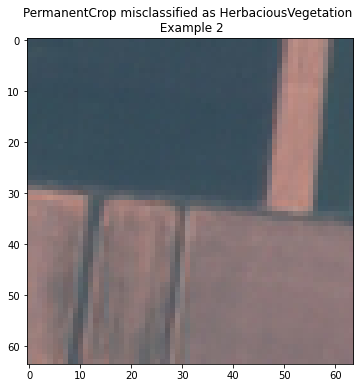

In [47]:
# Example of a "PermanentCrop" image classified unsuccessfully (misclassified as "HerbaciousVegetation")
plt.figure(figsize=(6, 6))
fail_2 = np.where((y_test == 6) & (y_preds == 2))[0][5]
fail_2_img = io.imread(img_files[fail_2])
plt.imshow(fail_2_img);
plt.title('PermanentCrop misclassified as HerbaciousVegetation \n Example 2');


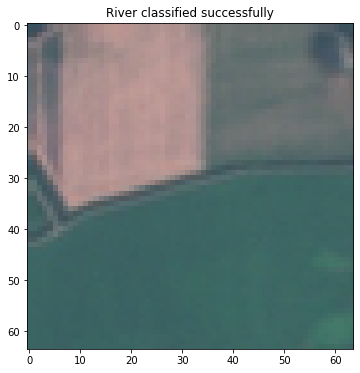

In [52]:
# Example of a "River" image classified successfully
plt.figure(figsize=(6, 6))
success_2 = np.where((y_test == 8) & (y_preds == 8))[0][14]
success_2_img = io.imread(img_files[success_2])
plt.imshow(success_2_img);
plt.title('River classified successfully');


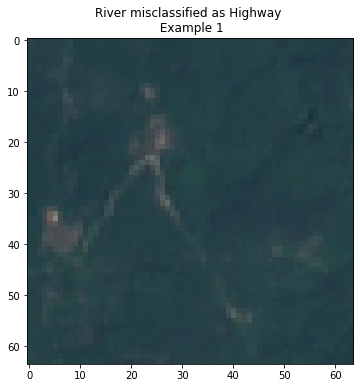

In [55]:
# Example of a "River" image classified unsuccessfully (misclassified as "Highway")
plt.figure(figsize=(6, 6))
fail_3 = np.where((y_test == 8) & (y_preds == 3))[0][30]
fail_3_img = io.imread(img_files[fail_3])
plt.imshow(fail_3_img);
plt.title('River misclassified as Highway \n Example 1');


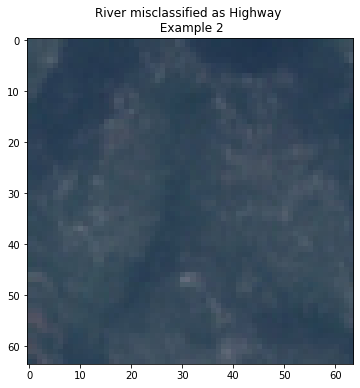

In [56]:
# Example of a "River" image classified unsuccessfully (misclassified as "Highway")
plt.figure(figsize=(6, 6))
fail_3 = np.where((y_test == 8) & (y_preds == 3))[0][50]
fail_3_img = io.imread(img_files[fail_3])
plt.imshow(fail_3_img);
plt.title('River misclassified as Highway \n Example 2');

### S7:

- Apply your best model on multispectral images. You may use whichever image channels you wish, so long as you use more than just RGB (although you are not required to use any color channels).

Q7.1: Calculate classification accuracy on the test data.

Q7.2: Compare against results using RGB images.

_I decided to select the bands associated with color infrared imaging because this combination is intented to emphasize healthy and unhealthy vegetation. The bands are B8 (near-infrared), B2, and B3. Denser vegetation is reflected in a deeper red on a color infrared image, whereas more urbanized areas are white. Due to the several classes related to crops and vegetation in this dataset, I thought this would be an interested combination to evaluate._


**Q7.1:** **M5_2** calcuated classification accuracy on test data of multispectral images dataset: **0.8711** (87.1%)

_Q7.2 - Response provided later in this section, above the confusion matrix_

In [61]:
import tifffile

In [58]:
# data
DATASET_MS = "./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif"
DATASET_MS

'./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif'

In [59]:
# MS filepaths
imgs_files_MS= []
for file in glob.glob(DATASET_MS + os.sep + "*" + os.sep + "*.tif"):
  imgs_files_MS.append(file)

In [62]:
# Load the multispectral images from the MS filepaths
imgs_MS = []
for imgName_MS in imgs_files_MS:
  tmp_MS = tifffile.imread(imgName_MS)
  imgs_MS.append(tmp_MS)

In [63]:
# get array shape
np.asarray(imgs_MS).shape

(27000, 64, 64, 13)

In [78]:
# Check shape of one img
np.asarray(tmp_MS).shape

(64, 64, 13)

In [79]:
# stack
images_MS = np.stack(imgs_MS)

In [81]:
images_MS.shape

(27000, 64, 64, 13)

In [67]:
# Get the color channels for color infrared
img_channels = images_MS[:,:,:,[2,3,7]]

(27000, 64, 64, 3)

In [82]:
# stack again
img_channels_stack = np.stack(img_channels)

In [85]:
img_channels_stack.shape

(27000, 64, 64, 3)

In [86]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(img_channels_stack, y, test_size=0.5, random_state=42, stratify=y)

In [87]:
X_train.shape

(13500, 64, 64, 3)

In [90]:
# Fit
history_MS = M5_2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/12
211/211 [==============================] - 19s 90ms/step - loss: 0.1527 - accuracy: 0.9438 - val_loss: 0.4557 - val_accuracy: 0.8750
Epoch 2/12
211/211 [==============================] - 17s 80ms/step - loss: 0.1595 - accuracy: 0.9433 - val_loss: 0.4930 - val_accuracy: 0.8605
Epoch 3/12
211/211 [==============================] - 19s 88ms/step - loss: 0.1193 - accuracy: 0.9566 - val_loss: 0.4527 - val_accuracy: 0.8774
Epoch 4/12
211/211 [==============================] - 21s 97ms/step - loss: 0.1287 - accuracy: 0.9539 - val_loss: 0.5237 - val_accuracy: 0.8659
Epoch 5/12
211/211 [==============================] - 18s 85ms/step - loss: 0.1108 - accuracy: 0.9601 - val_loss: 0.4881 - val_accuracy: 0.8656
Epoch 6/12
211/211 [==============================] - 21s 97ms/step - loss: 0.1184 - accuracy: 0.9572 - val_loss: 0.4674 - val_accuracy: 0.8770
Epoch 7/12
211/211 [==============================] - 28s 135ms/step - loss: 0.1215 - accuracy: 0.9576 - val_loss: 0.4803 - val_accuracy

In [91]:
# Score
score = M5_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5203655362129211
Test accuracy: 0.8711851835250854


In [92]:
# Get the results with label error for each class
M5_2_results_MS = M5_2.predict(X_test)

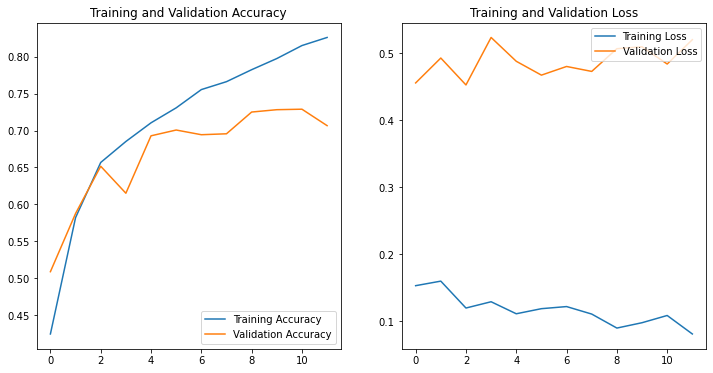

In [94]:
# Visualize metrics for M5_2 on MS
loss = history_MS.history['loss']
val_loss = history_MS.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [95]:
# y_preds using argmax (index of highest probability indicates predicted class)
y_preds_MS = np.argmax(M5_2_results_MS, axis=1)

In [96]:
cm_MS = confusion_matrix(y_test, y_preds_MS)

**Q7.2:** This model produces actually slightly worse results on the multispectral dataset compared to the RBG images dataset. While the normalized accuracy appears fairly balanced across the classes, like with the RBG images, the PermanentCrops misclassified as HerbaciousVegetation actually got slightly worse (0.08 to now 0.09). While not a big difference, it shows that these classes may be very similar in terms of desnficiation of the crops, and the color infrared may be quicker to detect presence of the green chlorophyl and more easily confuse these vegetation-related classes. The HerbaciousVegetation misclassifications as PermanentCrops are also worse in this model, reaching 0.10 (from 0.07), showing again that these classes may be the most difficult for this model to differentiate between consistently. The river to highway misclassification actually did improve compared to the RBG images test (going from 0.08 to 0.05), indicating that this band combination more clearly distinguishes between them.

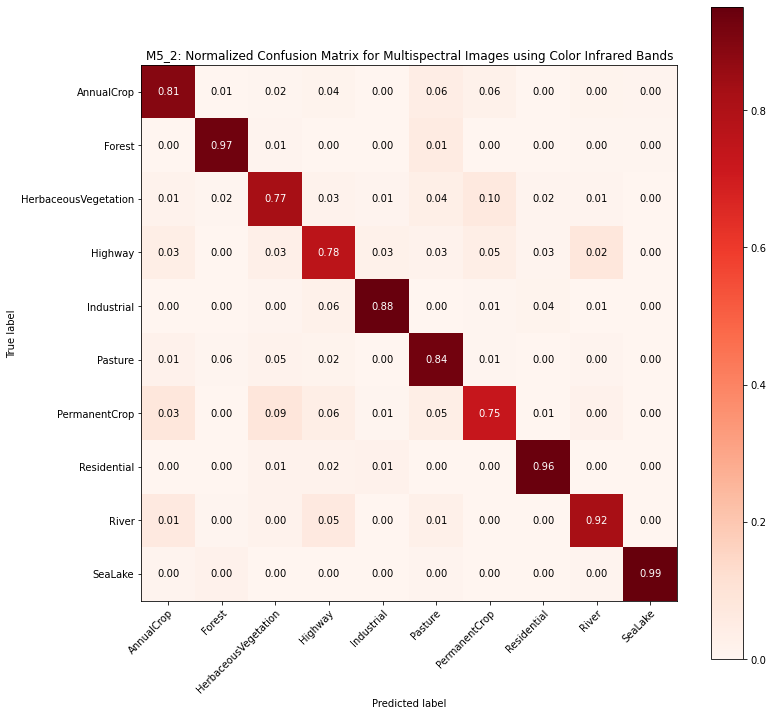

In [98]:
# Plot the confusion matrix
%matplotlib inline
plt.rcParams['axes.grid'] = False 
cm_MS = cm_MS.astype('float') / cm_MS.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm_MS.shape[1]),
       yticks=np.arange(cm_MS.shape[0]),
       xticklabels=LABELS, yticklabels=LABELS,
       title='M5_2: Normalized Confusion Matrix for Multispectral Images using Color Infrared Bands',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
         
fmt = '.2f'
thresh = cm_MS.max() / 2.
for i in range(cm_MS.shape[0]):
    for j in range(cm_MS.shape[1]):
        ax.text(j, i, format(cm_MS[i, j], fmt),
                ha="center", va="center",
                color="white" if cm_MS[i, j] > thresh else "black");